In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Code Challenge 1 - Decompose vector to its orthogonal components

Confirmation of results algebraically: Two outputs should be the same
[2 3]
[2. 3.]


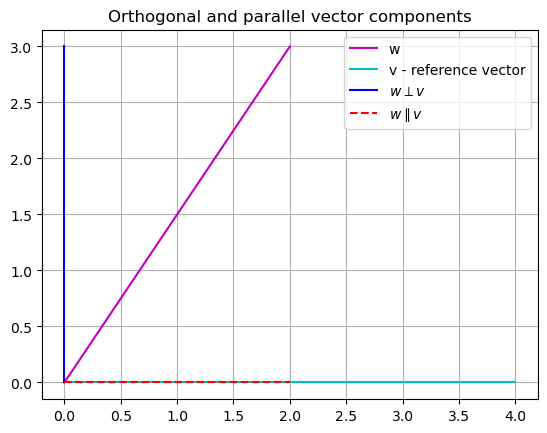

In [3]:
# Vector w to be decomposed 
w = np.array([2,3])

# Vector v - the reference 
v = np.array([4,0])

# Compute w parallel to v 
w_para_v = ((w.T@v)/(v.T@v))*v

# Compute w orthogonal to v 
w_orthog_v = w - w_para_v

# Confirm results algebraically (sum to w, orthogonal components)
print("Confirmation of results algebraically: Two outputs should be the same")
print(w)
print(w_orthog_v + w_para_v)

# Plot all four vectors 
plt.plot([0,w[0]], [0,w[1]],'m', label = 'w')
plt.plot([0,v[0]], [0,v[1]], 'c' ,label = 'v - reference vector')
plt.plot([0, w_orthog_v[0]], [0, w_orthog_v[1]], 'b', label = '$ w \perp v $')
plt.plot([0,w_para_v[0]], [0,w_para_v[1]],'r--', label = '$ w \parallel v $')
plt.grid()
plt.legend()
plt.title("Orthogonal and parallel vector components")
plt.show()

# Code Challenge 2 - Matrix Inverse via QR decomposition
## This is a more numerically stable method of computing the matrix inverse 

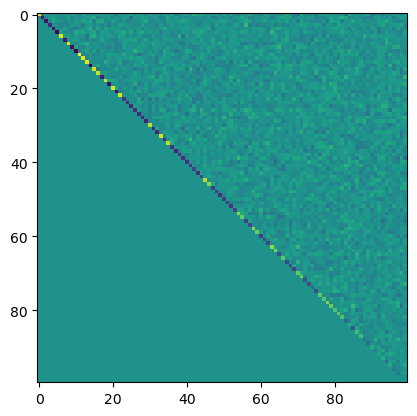

In [19]:
 """
 Matrix inverse via QR decomposition 
 """
    
# Create a large matrix
m = 100
n = 100
A = np.random.randn(m,n) 

# Explicit inverse 
Ai = np.linalg.inv(A) 

# Visual representation of the QR 
Q,R = np.linalg.qr(A,'complete')

plt.imshow(R)
plt.show()

Text(0.5, 1.0, '$Q^{-1}$ from solve')

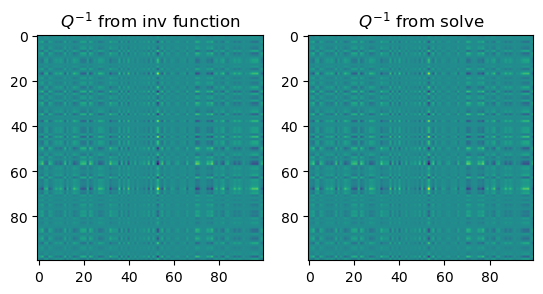

In [25]:
# Calculate the inverse using the QR 

"""
Using two methods, Ainv and Ainv2. Ainv uses the inv function from numpy. 
This is not the best way as calling the inverse directly is numerically unstable. 
Ainv2 uses the np.linalg.solve function which is more accurate.  
"""
Ainv = np.linalg.inv(R)@Q.T 
Ainv2 = np.linalg.solve(R,Q.T) 

# Plotting 
plt.subplot(1,2,1)
plt.imshow(Ainv)
plt.title('$Q^{-1}$ from inv function')

plt.subplot(1,2,2)
plt.imshow(Ainv2)
plt.title('$Q^{-1}$ from solve')

# Code Challenge 3 - Show that A^TA = R^TR (R from QR) 
#### We can see that the matrices output from the above statement are the same. Substraction of one from the other will give the zeros matrix (note the computer rounding error) 

In [33]:
# 1. Generate random matrix A 
m = 5
n = 5 
A = np.random.randn(m,n) 

# 2. Compute its QR decomp 
Q,R = np.linalg.qr(A,'complete') 

# 3. Test the claim 
ATA = np.transpose(A)@A
RTR = np.transpose(R)@R

print(ATA,'\n')
print(RTR, '\n')
print(ATA - RTR)

[[ 2.18319834  1.89566514 -1.3484413  -0.80750476  0.69266504]
 [ 1.89566514  3.2968398  -0.3723303  -0.01590708  1.77331846]
 [-1.3484413  -0.3723303   1.50464066  1.10370847  0.25383947]
 [-0.80750476 -0.01590708  1.10370847  6.28710526  0.9233876 ]
 [ 0.69266504  1.77331846  0.25383947  0.9233876   1.92366884]] 

[[ 2.18319834  1.89566514 -1.3484413  -0.80750476  0.69266504]
 [ 1.89566514  3.2968398  -0.3723303  -0.01590708  1.77331846]
 [-1.3484413  -0.3723303   1.50464066  1.10370847  0.25383947]
 [-0.80750476 -0.01590708  1.10370847  6.28710526  0.9233876 ]
 [ 0.69266504  1.77331846  0.25383947  0.9233876   1.92366884]] 

[[-8.88178420e-16 -2.22044605e-16 -2.22044605e-16  0.00000000e+00
   1.11022302e-16]
 [-2.22044605e-16  4.44089210e-16 -3.33066907e-16  5.55111512e-17
   4.44089210e-16]
 [-2.22044605e-16 -3.33066907e-16  2.22044605e-16 -2.22044605e-16
  -6.10622664e-16]
 [ 0.00000000e+00  5.55111512e-17 -2.22044605e-16  5.32907052e-15
   1.44328993e-15]
 [ 1.11022302e-16  4.440